In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 26 21:16:52 2024

@author: Yunus
"""

'\nCreated on Thu Sep 26 21:16:52 2024\n\n@author: Yunus\n'

In [2]:
#pip install networkx matplotlib


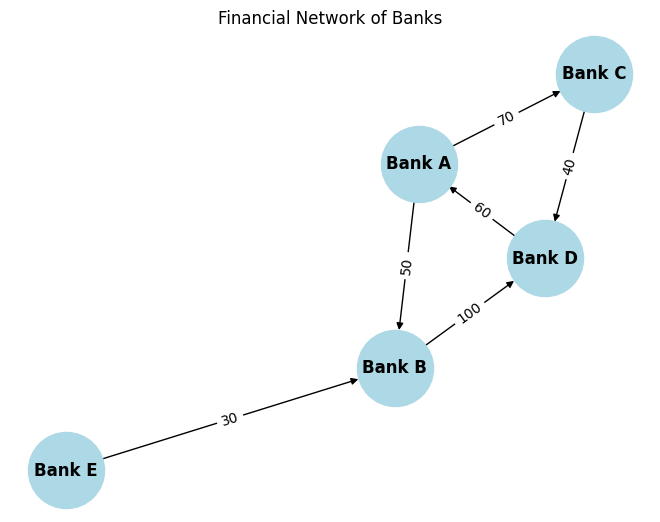

In [3]:
# We’ll create a simple graph representing banks and their financial relationships (loans between them)

import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Adding nodes (representing financial institutions)
banks = ["Bank A", "Bank B", "Bank C", "Bank D", "Bank E"]
G.add_nodes_from(banks)

# Adding directed edges (representing loans between banks)
# Format: (from_bank, to_bank, weight=amount)
loans = [("Bank A", "Bank B", 50),
         ("Bank A", "Bank C", 70),
         ("Bank B", "Bank D", 100),
         ("Bank C", "Bank D", 40),
         ("Bank D", "Bank A", 60),
         ("Bank E", "Bank B", 30)]

G.add_weighted_edges_from(loans)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes for visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold')

# Add edge labels (loan amounts)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Financial Network of Banks")
plt.show()


In [4]:
# Find the bank with the highest number of incoming relationships (loans)
# Calculate in-degrees (how many loans each bank receives)
in_degrees = G.in_degree(weight='weight')
most_indebted_bank = max(in_degrees, key=lambda x: x[1])

print(f"The bank with the highest incoming loans: {most_indebted_bank[0]} with a total loan value of {most_indebted_bank[1]}")


The bank with the highest incoming loans: Bank D with a total loan value of 140


In [14]:
# Find the shortest path between two banks (least number of hops)
# Shortest path between Bank A and Bank D (based on number of relationships)
shortest_path = nx.shortest_path(G, source="Bank A", target="Bank D")
print(f"The shortest path between Bank A and Bank D is: {shortest_path}")


The shortest path between Bank A and Bank D is: ['Bank A', 'Bank B', 'Bank D']


In [16]:
# Find the total loan value coming from each bank
# Calculate out-degrees (total loan value each bank gives)
out_degrees = G.out_degree(weight='weight')
for bank, total_loaned in out_degrees:
    print(f"{bank} has loaned a total value of {total_loaned}")


Bank A has loaned a total value of 120
Bank B has loaned a total value of 100
Bank C has loaned a total value of 40
Bank D has loaned a total value of 60
Bank E has loaned a total value of 30


In [18]:
# Finding the shortest path between Bank A and Bank D based on loan weights (least loaned value)
shortest_weighted_path = nx.shortest_path(G, source="Bank A", target="Bank D", weight='weight')
shortest_weighted_length = nx.shortest_path_length(G, source="Bank A", target="Bank D", weight='weight')

print(f"The shortest weighted path between Bank A and Bank D is: {shortest_weighted_path}")
print(f"The total loan amount along this path is: {shortest_weighted_length}")


The shortest weighted path between Bank A and Bank D is: ['Bank A', 'Bank C', 'Bank D']
The total loan amount along this path is: 110


In [20]:
# Degree centrality (measures how connected each bank is)
degree_centrality = nx.degree_centrality(G)
print("\nDegree Centrality:")
for bank, centrality in degree_centrality.items():
    print(f"{bank}: {centrality:.2f}")



Degree Centrality:
Bank A: 0.75
Bank B: 0.75
Bank C: 0.50
Bank D: 0.75
Bank E: 0.25


In [22]:
# Betweenness centrality (how often a bank lies on shortest paths between other banks)
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, weight='weight')
print("\nBetweenness Centrality:")
for bank, centrality in betweenness_centrality.items():
    print(f"{bank}: {centrality:.2f}")



Betweenness Centrality:
Bank A: 0.42
Bank B: 0.25
Bank C: 0.08
Bank D: 0.50
Bank E: 0.00


In [24]:
# PageRank (importance of a bank based on its connections and the importance of those connected to it)
pagerank = nx.pagerank(G, weight='weight')
print("\nPageRank:")
for bank, rank in pagerank.items():
    print(f"{bank}: {rank:.2f}")



PageRank:
Bank A: 0.30
Bank B: 0.16
Bank C: 0.18
Bank D: 0.32
Bank E: 0.03


In [26]:
from networkx.algorithms.community import girvan_newman

# Applying the Girvan-Newman community detection algorithm
communities = girvan_newman(G)
first_level_communities = next(communities)  # First level of the hierarchy (biggest split)
community_list = [list(community) for community in first_level_communities]

print("\nDetected Communities:")
for idx, community in enumerate(community_list):
    print(f"Community {idx+1}: {community}")



Detected Communities:
Community 1: ['Bank B', 'Bank A', 'Bank D', 'Bank C']
Community 2: ['Bank E']


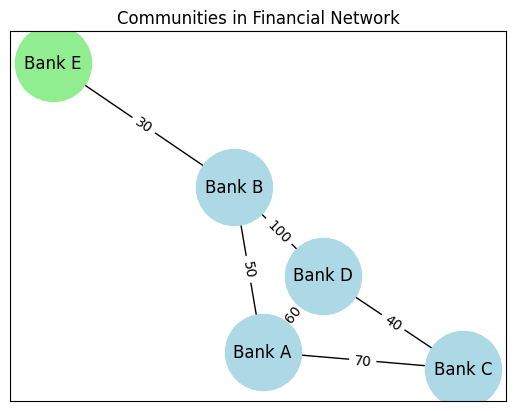

In [28]:
# Assign colors to communities for visualization
import itertools

# Define colors for each community
colors = itertools.cycle(["lightblue", "lightgreen", "orange", "pink"])

# Draw the graph with communities highlighted
pos = nx.spring_layout(G)
for community, color in zip(community_list, colors):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=color, node_size=3000)

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Communities in Financial Network")
plt.show()


In [30]:
# Calculate clustering coefficient for each bank
clustering_coeff = nx.clustering(G)
print("\nClustering Coefficients:")
for bank, coeff in clustering_coeff.items():
    print(f"{bank}: {coeff:.2f}")



Clustering Coefficients:
Bank A: 0.33
Bank B: 0.17
Bank C: 0.50
Bank D: 0.33
Bank E: 0.00


In [32]:
# Calculate the density of the graph
density = nx.density(G)
print(f"\nGraph Density: {density:.2f}")



Graph Density: 0.30


In [34]:
# Perform k-core decomposition to find the most connected core of the graph
k_core = nx.k_core(G)
print(f"\nNodes in the highest k-core: {list(k_core.nodes())}")



Nodes in the highest k-core: ['Bank A', 'Bank B', 'Bank C', 'Bank D']


In [36]:
# Calculate edge betweenness centrality (how important each loan is)
edge_betweenness = nx.edge_betweenness_centrality(G, normalized=True, weight='weight')
print("\nEdge Betweenness Centrality:")
for edge, centrality in edge_betweenness.items():
    print(f"{edge}: {centrality:.4f}")



Edge Betweenness Centrality:
('Bank A', 'Bank B'): 0.1500
('Bank A', 'Bank C'): 0.2500
('Bank B', 'Bank D'): 0.3000
('Bank C', 'Bank D'): 0.2000
('Bank D', 'Bank A'): 0.4500
('Bank E', 'Bank B'): 0.2000


In [38]:
# Dijkstra’s shortest path based on loan amounts
dijkstra_path = nx.dijkstra_path(G, source="Bank A", target="Bank D", weight='weight')
dijkstra_path_length = nx.dijkstra_path_length(G, source="Bank A", target="Bank D", weight='weight')

print(f"\nDijkstra's Shortest Path from Bank A to Bank D: {dijkstra_path}")
print(f"Total loan amount along this path: {dijkstra_path_length}")



Dijkstra's Shortest Path from Bank A to Bank D: ['Bank A', 'Bank C', 'Bank D']
Total loan amount along this path: 110


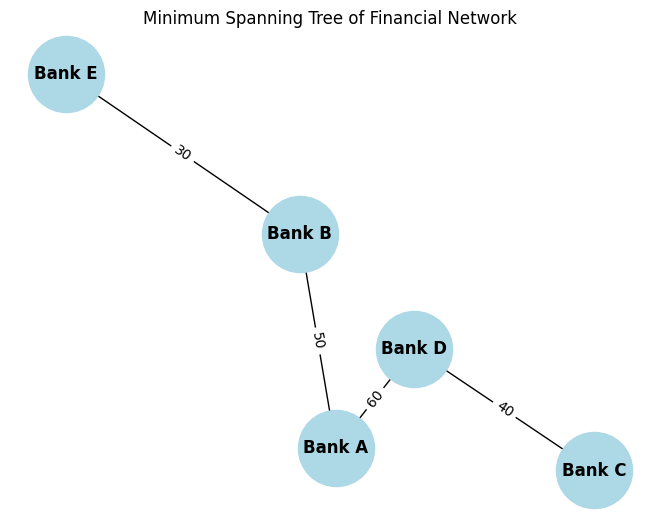

In [48]:
# Finding the Minimum Spanning Tree (MST) based on loan amounts
# Convert directed graph to undirected
undirected_G = G.to_undirected()

# Finding the Minimum Spanning Tree (MST) based on loan amounts
mst = nx.minimum_spanning_tree(undirected_G, weight='weight')

# Draw the MST
plt.figure()
nx.draw(mst, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(mst, pos, edge_labels=nx.get_edge_attributes(mst, 'weight'))

plt.title("Minimum Spanning Tree of Financial Network")
plt.show()


In [52]:
# Calculate the diameter of the graph (maximum shortest path)

# Get the largest strongly connected component (SCC)
largest_scc = max(nx.strongly_connected_components(G), key=len)
subgraph = G.subgraph(largest_scc)

# Calculate the diameter of the largest SCC
diameter = nx.diameter(subgraph)
print(f"\nGraph Diameter of Largest Strongly Connected Component: {diameter}")



Graph Diameter of Largest Strongly Connected Component: 3


In [54]:
# Convert the directed graph to an undirected graph
undirected_G = G.to_undirected()

# Calculate the diameter of the undirected graph
diameter = nx.diameter(undirected_G)
print(f"\nGraph Diameter (Undirected): {diameter}")



Graph Diameter (Undirected): 3


In [44]:
# Remove the most central bank (by betweenness) and check graph connectivity
most_central_bank = max(betweenness_centrality, key=betweenness_centrality.get)
G_copy = G.copy()
G_copy.remove_node(most_central_bank)

# Check if the graph is still connected after removing the most central bank
is_connected = nx.is_connected(G_copy.to_undirected())
print(f"\nIs the graph still connected after removing {most_central_bank}? {is_connected}")



Is the graph still connected after removing Bank D? True


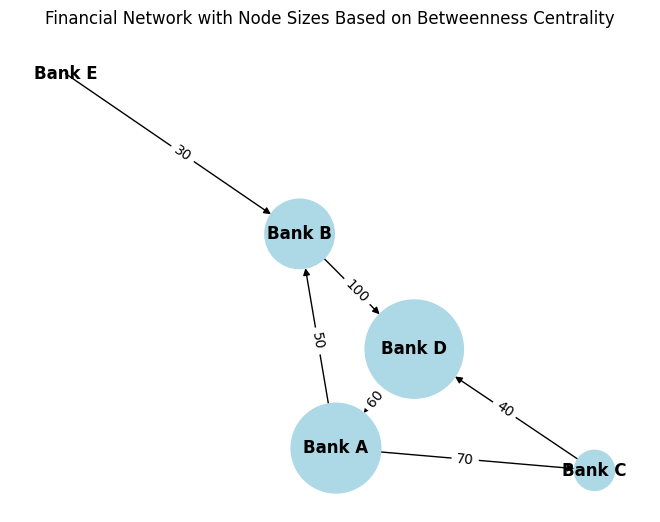

In [46]:
# Adjust node sizes based on betweenness centrality
node_size = [10000 * betweenness_centrality[bank] for bank in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=node_size, font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Financial Network with Node Sizes Based on Betweenness Centrality")
plt.show()
